In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
# Define the environment parameters
grid_size = 40  # 40x40 grid
start_state = (0, 0)
goal_state = (39, 39)
actions = ['up', 'down', 'left', 'right']  # Possible actions

In [ ]:
# Define the reward function
def reward_function(state):
    if state == goal_state:
        return 100  # Reward for reaching the goal
    else:
        return -1  # Penalty for each step

In [ ]:
# Initialize Q-table
q_table = np.zeros((grid_size, grid_size, len(actions)))

In [ ]:
# Parameters for Q-learning
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Exploration rate
epsilon_decay = 0.999
min_epsilon = 0.01
episodes = 100000  # Number of episodes

In [ ]:
# Helper functions
def get_next_state(state, action):
    x, y = state
    if action == 'up' and x > 0:
        return (x - 1, y)
    elif action == 'down' and x < grid_size - 1:
        return (x + 1, y)
    elif action == 'left' and y > 0:
        return (x, y - 1)
    elif action == 'right' and y < grid_size - 1:
        return (x, y + 1)
    return state

def choose_action(state):
    if random.uniform(0, 1) < epsilon:
        return random.choice(actions)
    else:
        return actions[np.argmax(q_table[state[0], state[1]])]

In [ ]:
# Training the agent
rewards_per_episode = []
for episode in range(episodes):
    state = start_state
    total_reward = 0

    while state != goal_state:
        action = choose_action(state)
        next_state = get_next_state(state, action)
        reward = reward_function(next_state)

        action_index = actions.index(action)
        max_next_q = np.max(q_table[next_state[0], next_state[1]])

        # Update Q-value using the Q-learning formula
        q_table[state[0], state[1], action_index] = q_table[state[0], state[1], action_index] + alpha * (reward + gamma * max_next_q - q_table[state[0], state[1], action_index])

        state = next_state
        total_reward += reward

    rewards_per_episode.append(total_reward)

    # Decay epsilon
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

    # Log progress
    if episode % 5000 == 0:
        print(f"Episode {episode}: Total Reward: {total_reward}")


Episode 0: Total Reward: -16815
Episode 5000: Total Reward: 23
Episode 10000: Total Reward: 23
Episode 15000: Total Reward: 23
Episode 20000: Total Reward: 23
Episode 25000: Total Reward: 17
Episode 30000: Total Reward: 21
Episode 35000: Total Reward: 23
Episode 40000: Total Reward: 23
Episode 45000: Total Reward: 23
Episode 50000: Total Reward: 21
Episode 55000: Total Reward: 23
Episode 60000: Total Reward: 23
Episode 65000: Total Reward: 23
Episode 70000: Total Reward: 19
Episode 75000: Total Reward: 23
Episode 80000: Total Reward: 21
Episode 85000: Total Reward: 23
Episode 90000: Total Reward: 23
Episode 95000: Total Reward: 23


In [ ]:
# Performance monitoring
print("Final Q-Values near the goal:", q_table[goal_state[0], goal_state[1]])
print("Final Q-Values near the start:", q_table[start_state[0], start_state[1]])

Final Q-Values near the goal: [0. 0. 0. 0.]
Final Q-Values near the start: [-8.67805045 -7.75560652 -8.67805045 -9.59126995]


In [ ]:
# Policy evaluation
def evaluate_policy():
    paths = []
    for start in [start_state, (10, 10), (30, 30), goal_state]:
        state = start
        path = []

        while state != goal_state and len(path) < 500:
            path.append(state)
            action = actions[np.argmax(q_table[state[0], state[1]])]
            state = get_next_state(state, action)

        paths.append((start, len(path), state == goal_state))
    return paths

policy_results = evaluate_policy()
for result in policy_results:
    print(f"Start: {result[0]} -> Path length: {result[1]} -> Goal reached: {result[2]}")

Start: (0, 0) -> Path length: 78 -> Goal reached: True
Start: (10, 10) -> Path length: 58 -> Goal reached: True
Start: (30, 30) -> Path length: 20 -> Goal reached: True
Start: (39, 39) -> Path length: 0 -> Goal reached: True


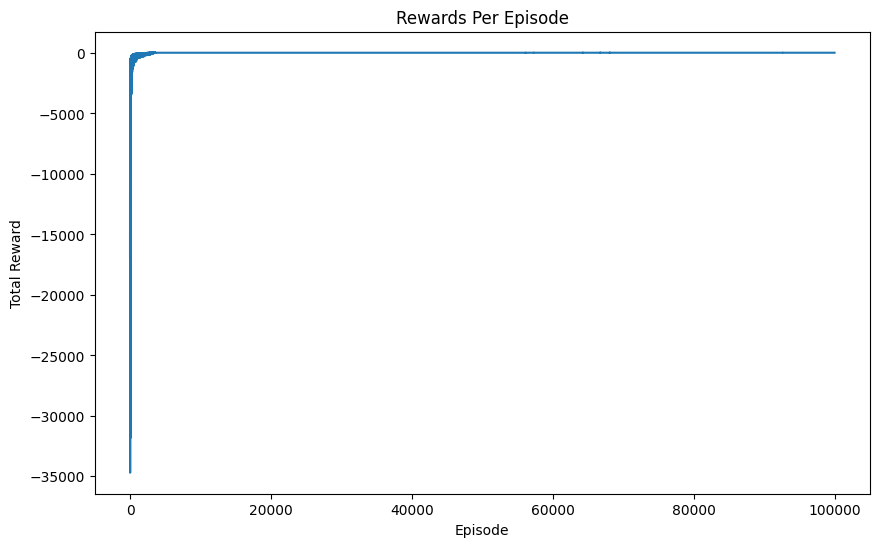

In [ ]:
# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(rewards_per_episode)
plt.title("Rewards Per Episode")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.show()

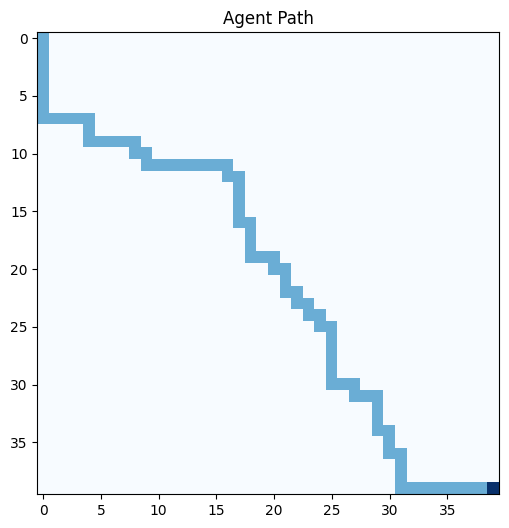

In [ ]:
# Visualizing the path
path_states = [start_state]
state = start_state
while state != goal_state and len(path_states) < 500:
    action = actions[np.argmax(q_table[state[0], state[1]])]
    state = get_next_state(state, action)
    path_states.append(state)

# Create a grid to display the path
grid = np.zeros((grid_size, grid_size))
for x, y in path_states:
    grid[x, y] = 1
grid[goal_state[0], goal_state[1]] = 2

plt.figure(figsize=(6, 6))
plt.imshow(grid, cmap="Blues")
plt.title("Agent Path")
plt.show()